### 이상치 데이터 처리
- 피쳐/특성에 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못입력된 경우, 자연으로 생성된 데이터
    * 잘못입력된 데이터 : 입력시 오타    ===> 제거 또는 대체
    * 자연 생성 데이터 : 연봉, 키, 몸무게, 나이  ==> 분리해서 전용 모델/ 식별용 피쳐
- 탐지
    * 시각화 확인
    * 데이터의 분포를 확인 : z-score / IQR (Turkey Fences)
- 처리
    * 삭제 / 대체/ 분리 모델 / 파생변수 추가

(1) 모듈 로딩 및 데이터 준비 <hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 임의의 데이터 
dataDF = pd.DataFrame({'num':[1,4,3,2,4,5,-14,2,1,15]})      # 일부러 이상치 만들기 위해
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


(2) 데이터 전처리 <hr>

(2-1) 데이터 확인

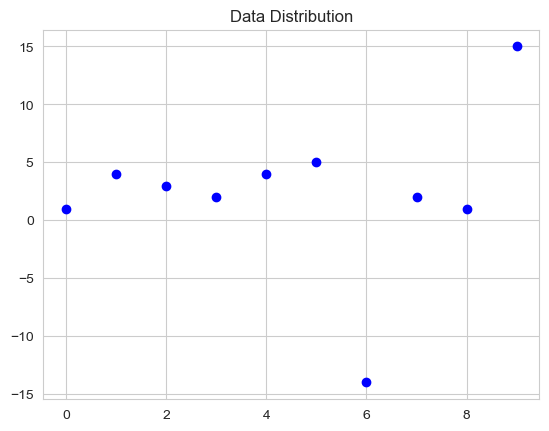

In [4]:
# 시각화로 데이터 분포 확인
plt.plot(dataDF, 'bo')
plt.title('Data Distribution')
plt.show()

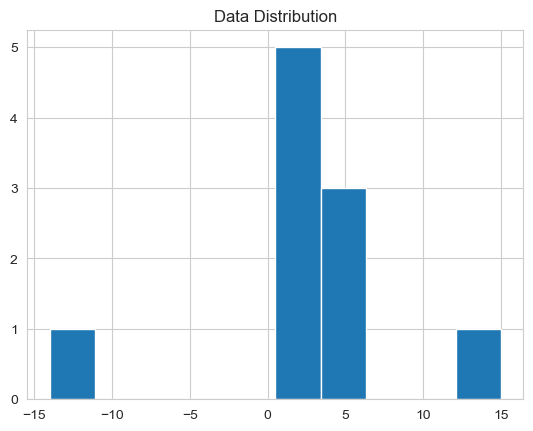

In [6]:
# 시각화로 데이터 분포 확인
plt.hist(dataDF)
plt.title('Data Distribution')
plt.show()

(2-2) 불필요 데이터 체크 => 결측치, 이상치

In [7]:
# 결측치
dataDF.isnull().sum()

num    0
dtype: int64

In [9]:
# 이상치 탐지 - 방법(1) 평균과 편차를 이용한 탐지 z-score
# z-score = 데이터 - 평균/표준편차
mean_value = dataDF.mean()
std_value = dataDF.std()

z_dataSR = (dataDF- mean_value)/std_value
z_dataSR

,num
0,-0.185065
1,0.242008
2,0.099650
3,-0.042707
4,0.242008
5,0.384366
6,-2.320430
7,-0.042707
8,-0.185065
9,1.807942


In [12]:
# 양끝단 제거를 위한 기준값 => 1.0
base=1.0
mask = z_dataSR.abs()>base
z_dataSR[~mask].dropna()

,num
0,-0.185065
1,0.242008
2,0.099650
3,-0.042707
4,0.242008
5,0.384366
7,-0.042707
8,-0.185065


In [15]:
dataDF[~mask].dropna(inplace=True)
dataDF[~mask]

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
6,NaN
7,2.0
8,1.0
9,NaN


In [20]:
# 이상치 탐지 - 방법(2) 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지
q1 = dataDF.quantile(0.25)
q3 = dataDF.quantile(0.75)
iqr = q3-q1
lower=q1-(iqr*1.5)
upper=q3+(iqr*1.5)




print(f'q1:{q1} \n q3:{q3}\niqr:{iqr}')
print(f'lower:{lower} \n upper:{upper}')

q1:num    1.25
Name: 0.25, dtype: float64 
 q3:num    4.0
Name: 0.75, dtype: float64
iqr:num    2.75
dtype: float64
lower:num   -2.875
dtype: float64 
 upper:num    8.125
dtype: float64


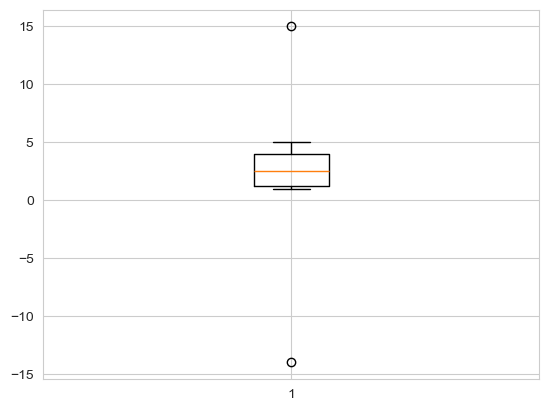

In [22]:
# 시각화
bp_obj=plt.boxplot(dataDF)
plt.show()

In [21]:
dataDF<lower, dataDF>upper

(     num
 0  False
 1  False
 2  False
 3  False
 4  False
 5  False
 6   True
 7  False
 8  False
 9  False,
      num
 0  False
 1  False
 2  False
 3  False
 4  False
 5  False
 6  False
 7  False
 8  False
 9   True)

In [26]:
# q1, min, q3, max
bp_obj['whiskers'][0].get_ydata(), bp_obj['whiskers'][1].get_ydata()

(array([1.25, 1.  ]), array([4., 5.]))

In [28]:
bp_obj['medians'][0].get_ydata()

array([2.5, 2.5])